___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset.

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning.

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will deploy your model using ***Streamlit API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
-

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df2 = df.copy()

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [6]:
!pip install deepchecks
!pip install numba

In [7]:
#  Data Integrity Checks

import sys
from deepchecks.tabular.suites import data_integrity
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates

In [11]:
#ds = Dataset(dirty_df, cat_features= ['type'], datetime_name='Date', label= 'AveragePrice')
ds = Dataset(df)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


In [12]:
# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_18RIFRS2AH0DCSIKQPMJRCAGX">Data Integrity Sui…

In [13]:
IsSingleValue().run(ds)

### Exploratory Data Analysis

In [14]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))

# Print the summary statistics without scientific notation
summary_table = df.describe()

# Save the summary statistics table as a CSV file
summary_table.to_csv('summary_statistics.csv', index=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Data Cleaning
Check Missing Values and Outliers

In [17]:
df.duplicated().sum()

1081

In [18]:
duplicates = df[df.duplicated()]

In [19]:
duplicates

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0000,-0.5299,0.8739,1.3472,0.1455,0.4142,0.1002,0.7112,0.1761,-0.2867,-0.4847,0.8725,0.8516,-0.5717,0.1010,-1.5198,-0.2844,-0.3105,-0.4042,-0.8234,-0.2903,0.0469,0.2081,-0.1855,0.0010,0.0988,-0.5529,-0.0733,0.0233,6.1400,0
35,26.0000,-0.5354,0.8653,1.3511,0.1476,0.4337,0.0870,0.6930,0.1797,-0.2856,-0.4825,0.8718,0.8534,-0.5718,0.1023,-1.5200,-0.2859,-0.3096,-0.4039,-0.8237,-0.2833,0.0495,0.2065,-0.1871,0.0008,0.0981,-0.5535,-0.0783,0.0254,1.7700,0
113,74.0000,1.0384,0.1275,0.1845,1.1099,0.4417,0.9453,-0.0367,0.3510,0.1189,-0.2433,0.5781,0.6747,-0.5342,0.4466,1.1229,-1.7680,1.2412,-2.4495,-1.7473,-0.3355,0.1025,0.6051,0.0231,-0.6265,0.4791,-0.1669,0.0812,0.0012,1.1800,0
114,74.0000,1.0384,0.1275,0.1845,1.1099,0.4417,0.9453,-0.0367,0.3510,0.1189,-0.2433,0.5781,0.6747,-0.5342,0.4466,1.1229,-1.7680,1.2412,-2.4495,-1.7473,-0.3355,0.1025,0.6051,0.0231,-0.6265,0.4791,-0.1669,0.0812,0.0012,1.1800,0
115,74.0000,1.0384,0.1275,0.1845,1.1099,0.4417,0.9453,-0.0367,0.3510,0.1189,-0.2433,0.5781,0.6747,-0.5342,0.4466,1.1229,-1.7680,1.2412,-2.4495,-1.7473,-0.3355,0.1025,0.6051,0.0231,-0.6265,0.4791,-0.1669,0.0812,0.0012,1.1800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0000,1.9125,-0.4552,-1.7507,0.4543,2.0891,4.1600,-0.8813,1.0817,1.0229,0.0054,-0.5420,0.7450,-0.3752,-0.0682,-0.7959,-0.4979,-0.1342,-1.0050,0.0861,-0.2076,-0.5241,-1.3375,0.4739,0.6167,-0.2835,-1.0848,0.0731,-0.0360,11.9900,0
283483,171627.0000,-1.4644,1.3681,0.8160,-0.6013,-0.6891,-0.4872,-0.3038,0.8850,0.0541,-0.8280,-1.1926,0.9450,1.3725,-0.0365,-0.2087,0.3201,-0.2049,-0.0248,-0.4689,0.0320,0.2872,0.9478,-0.2188,0.0829,0.0441,0.6393,0.2136,0.1193,6.8200,0
283485,171627.0000,-1.4580,1.3782,0.8115,-0.6038,-0.7119,-0.4717,-0.2825,0.8807,0.0528,-0.8306,-1.1918,0.9429,1.3726,-0.0380,-0.2085,0.3219,-0.2060,-0.0252,-0.4684,0.0237,0.2842,0.9497,-0.2169,0.0833,0.0449,0.6399,0.2194,0.1168,11.9300,0
284191,172233.0000,-2.6679,3.1605,-3.3560,1.0078,-0.3774,-0.1097,-0.6672,2.3097,-1.6393,-1.4498,-0.5089,0.6000,-0.6273,1.0175,-0.8874,0.4201,1.8565,1.3151,1.0961,-0.8217,0.3915,0.2665,-0.0799,-0.0964,0.0867,-0.4511,-1.1837,-0.2222,55.6600,0


In [20]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
df.dropna(inplace=True)

In [22]:
df.reset_index(drop=True, inplace=True)

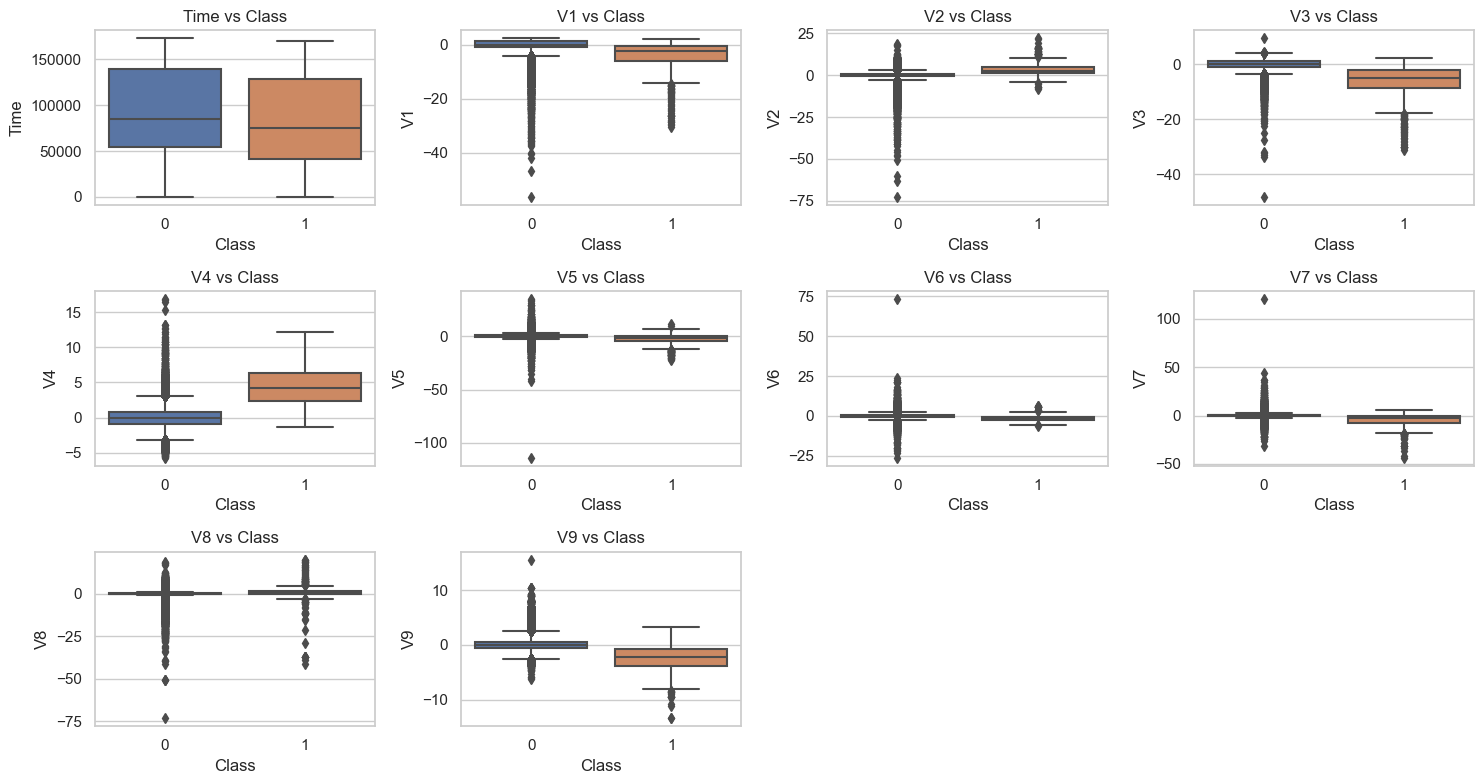

In [19]:
# Extract numerical features for box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[:10]

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

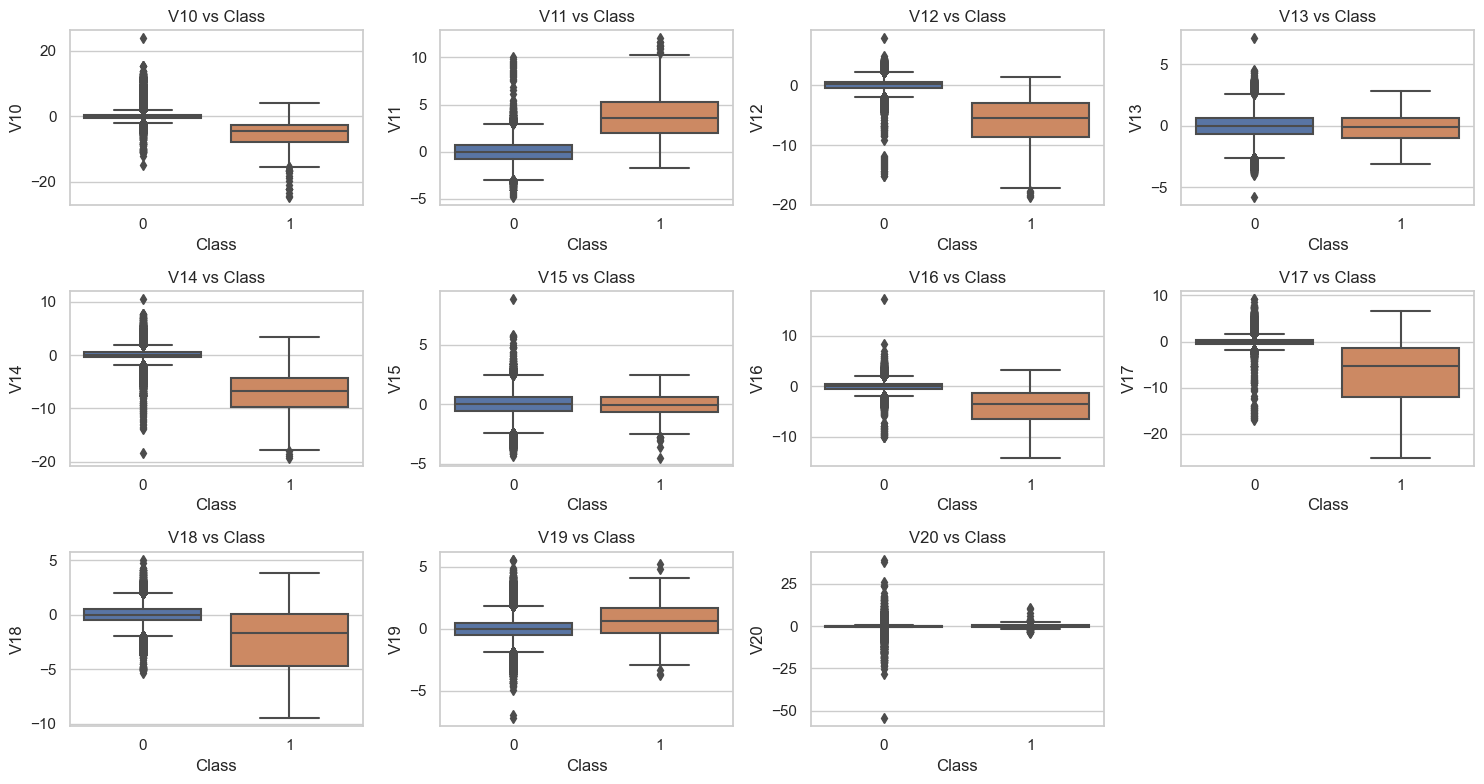

In [20]:
# Extract numerical features for box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[10:21]

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

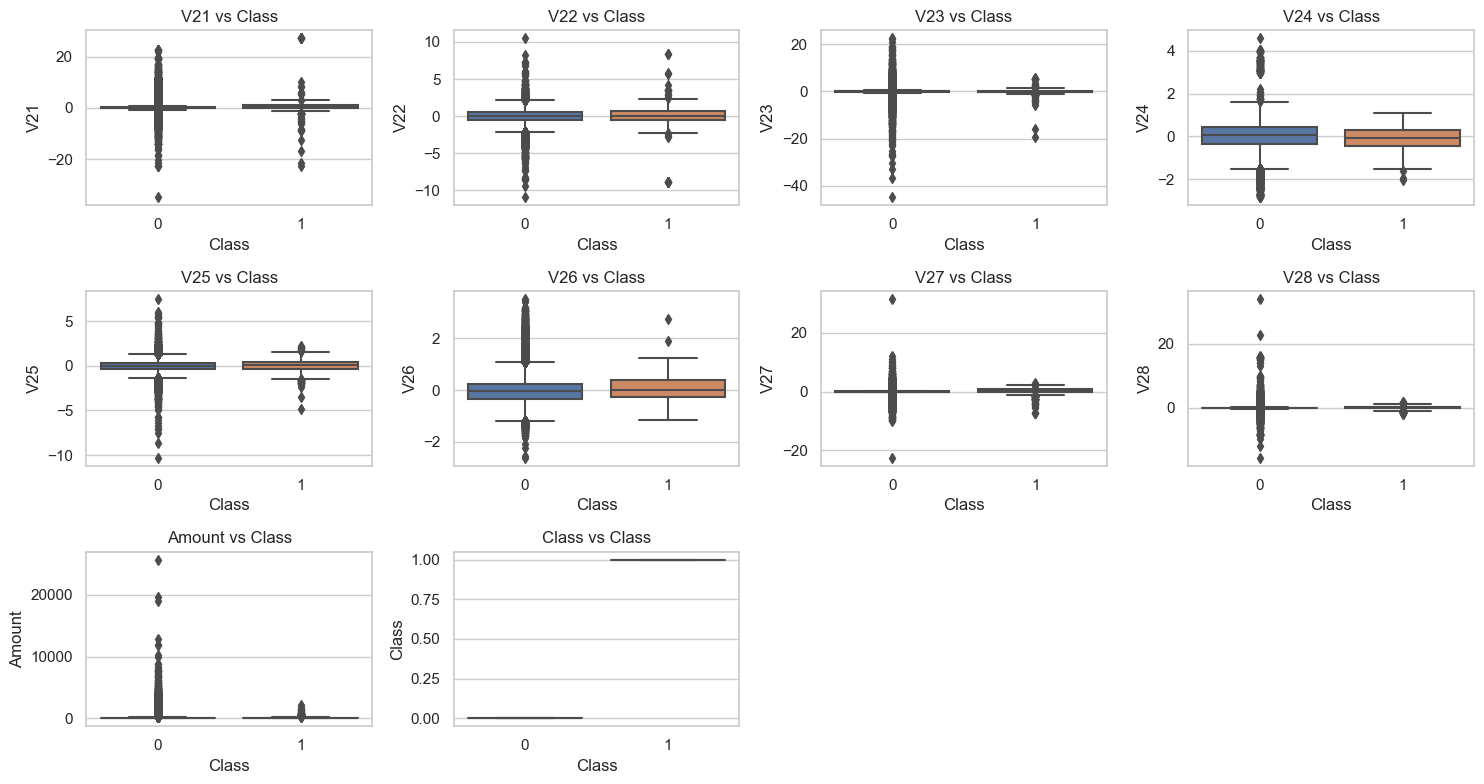

In [21]:
# Extract numerical features for box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[21:31]

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

In [22]:
from collections import Counter

def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers


feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [23]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,feature_list)


# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 31904


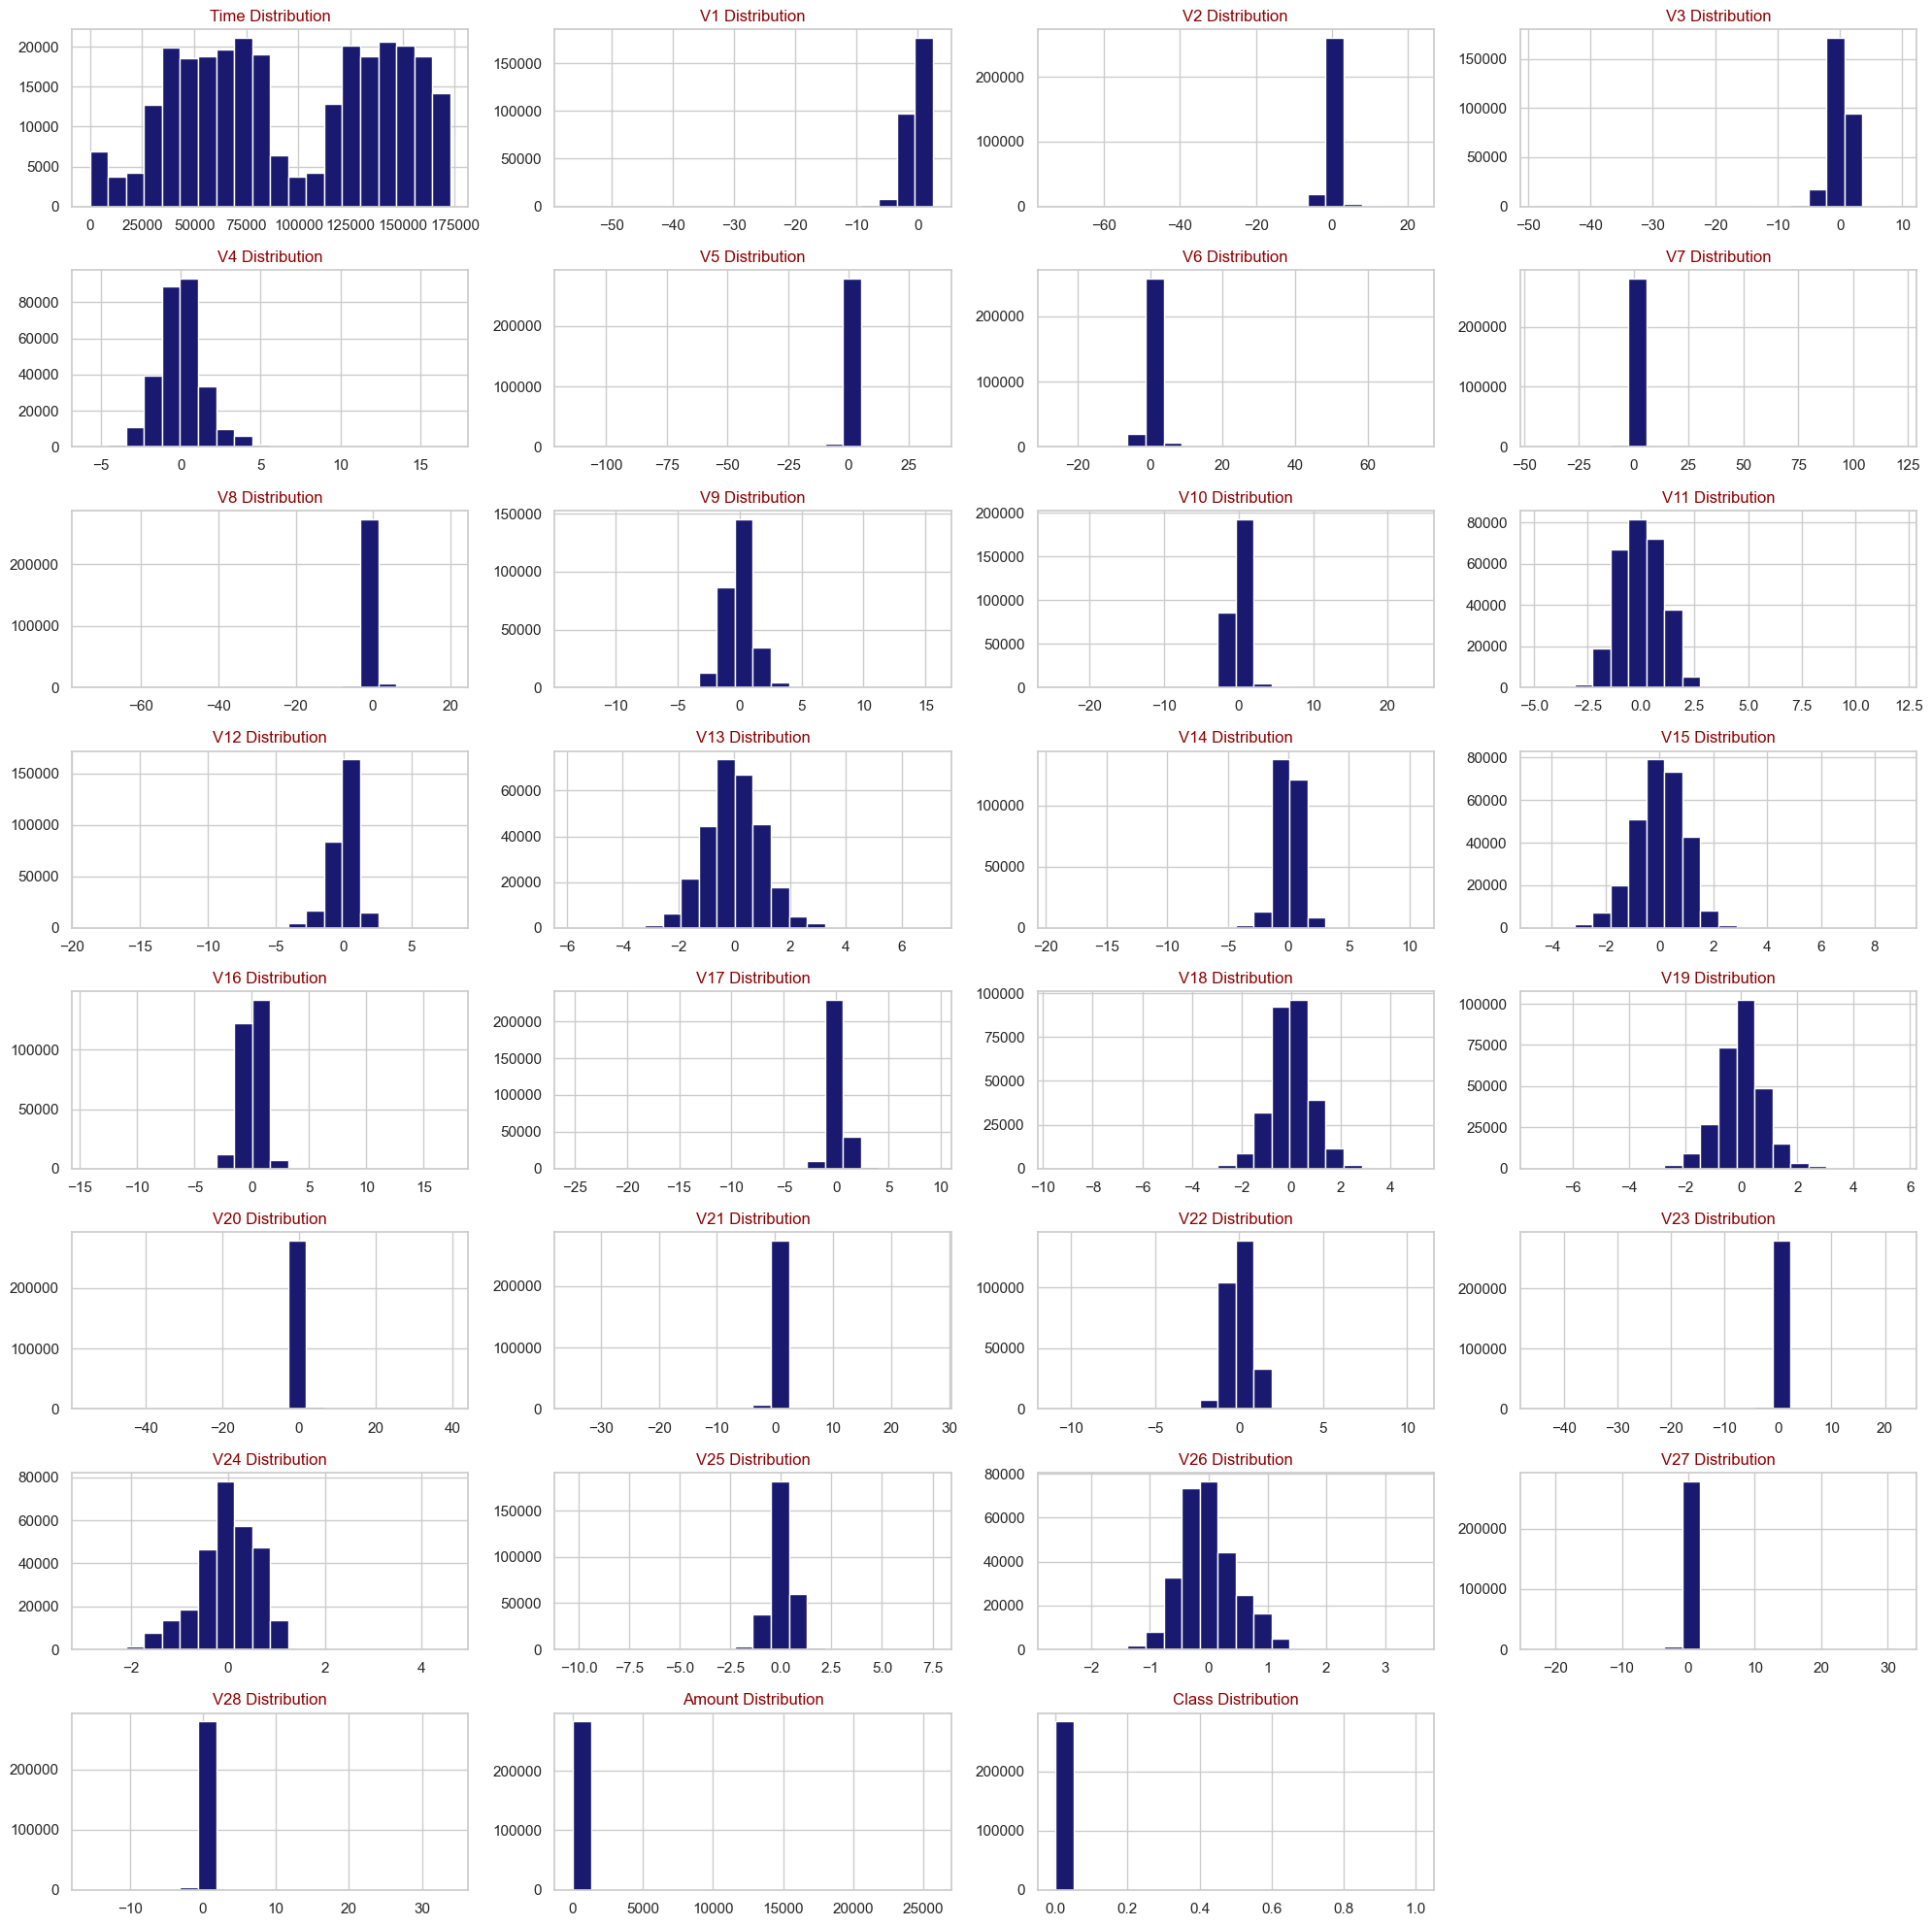

In [24]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
    fig.tight_layout()
    plt.show()
draw_histograms(df,df.columns,8,4)

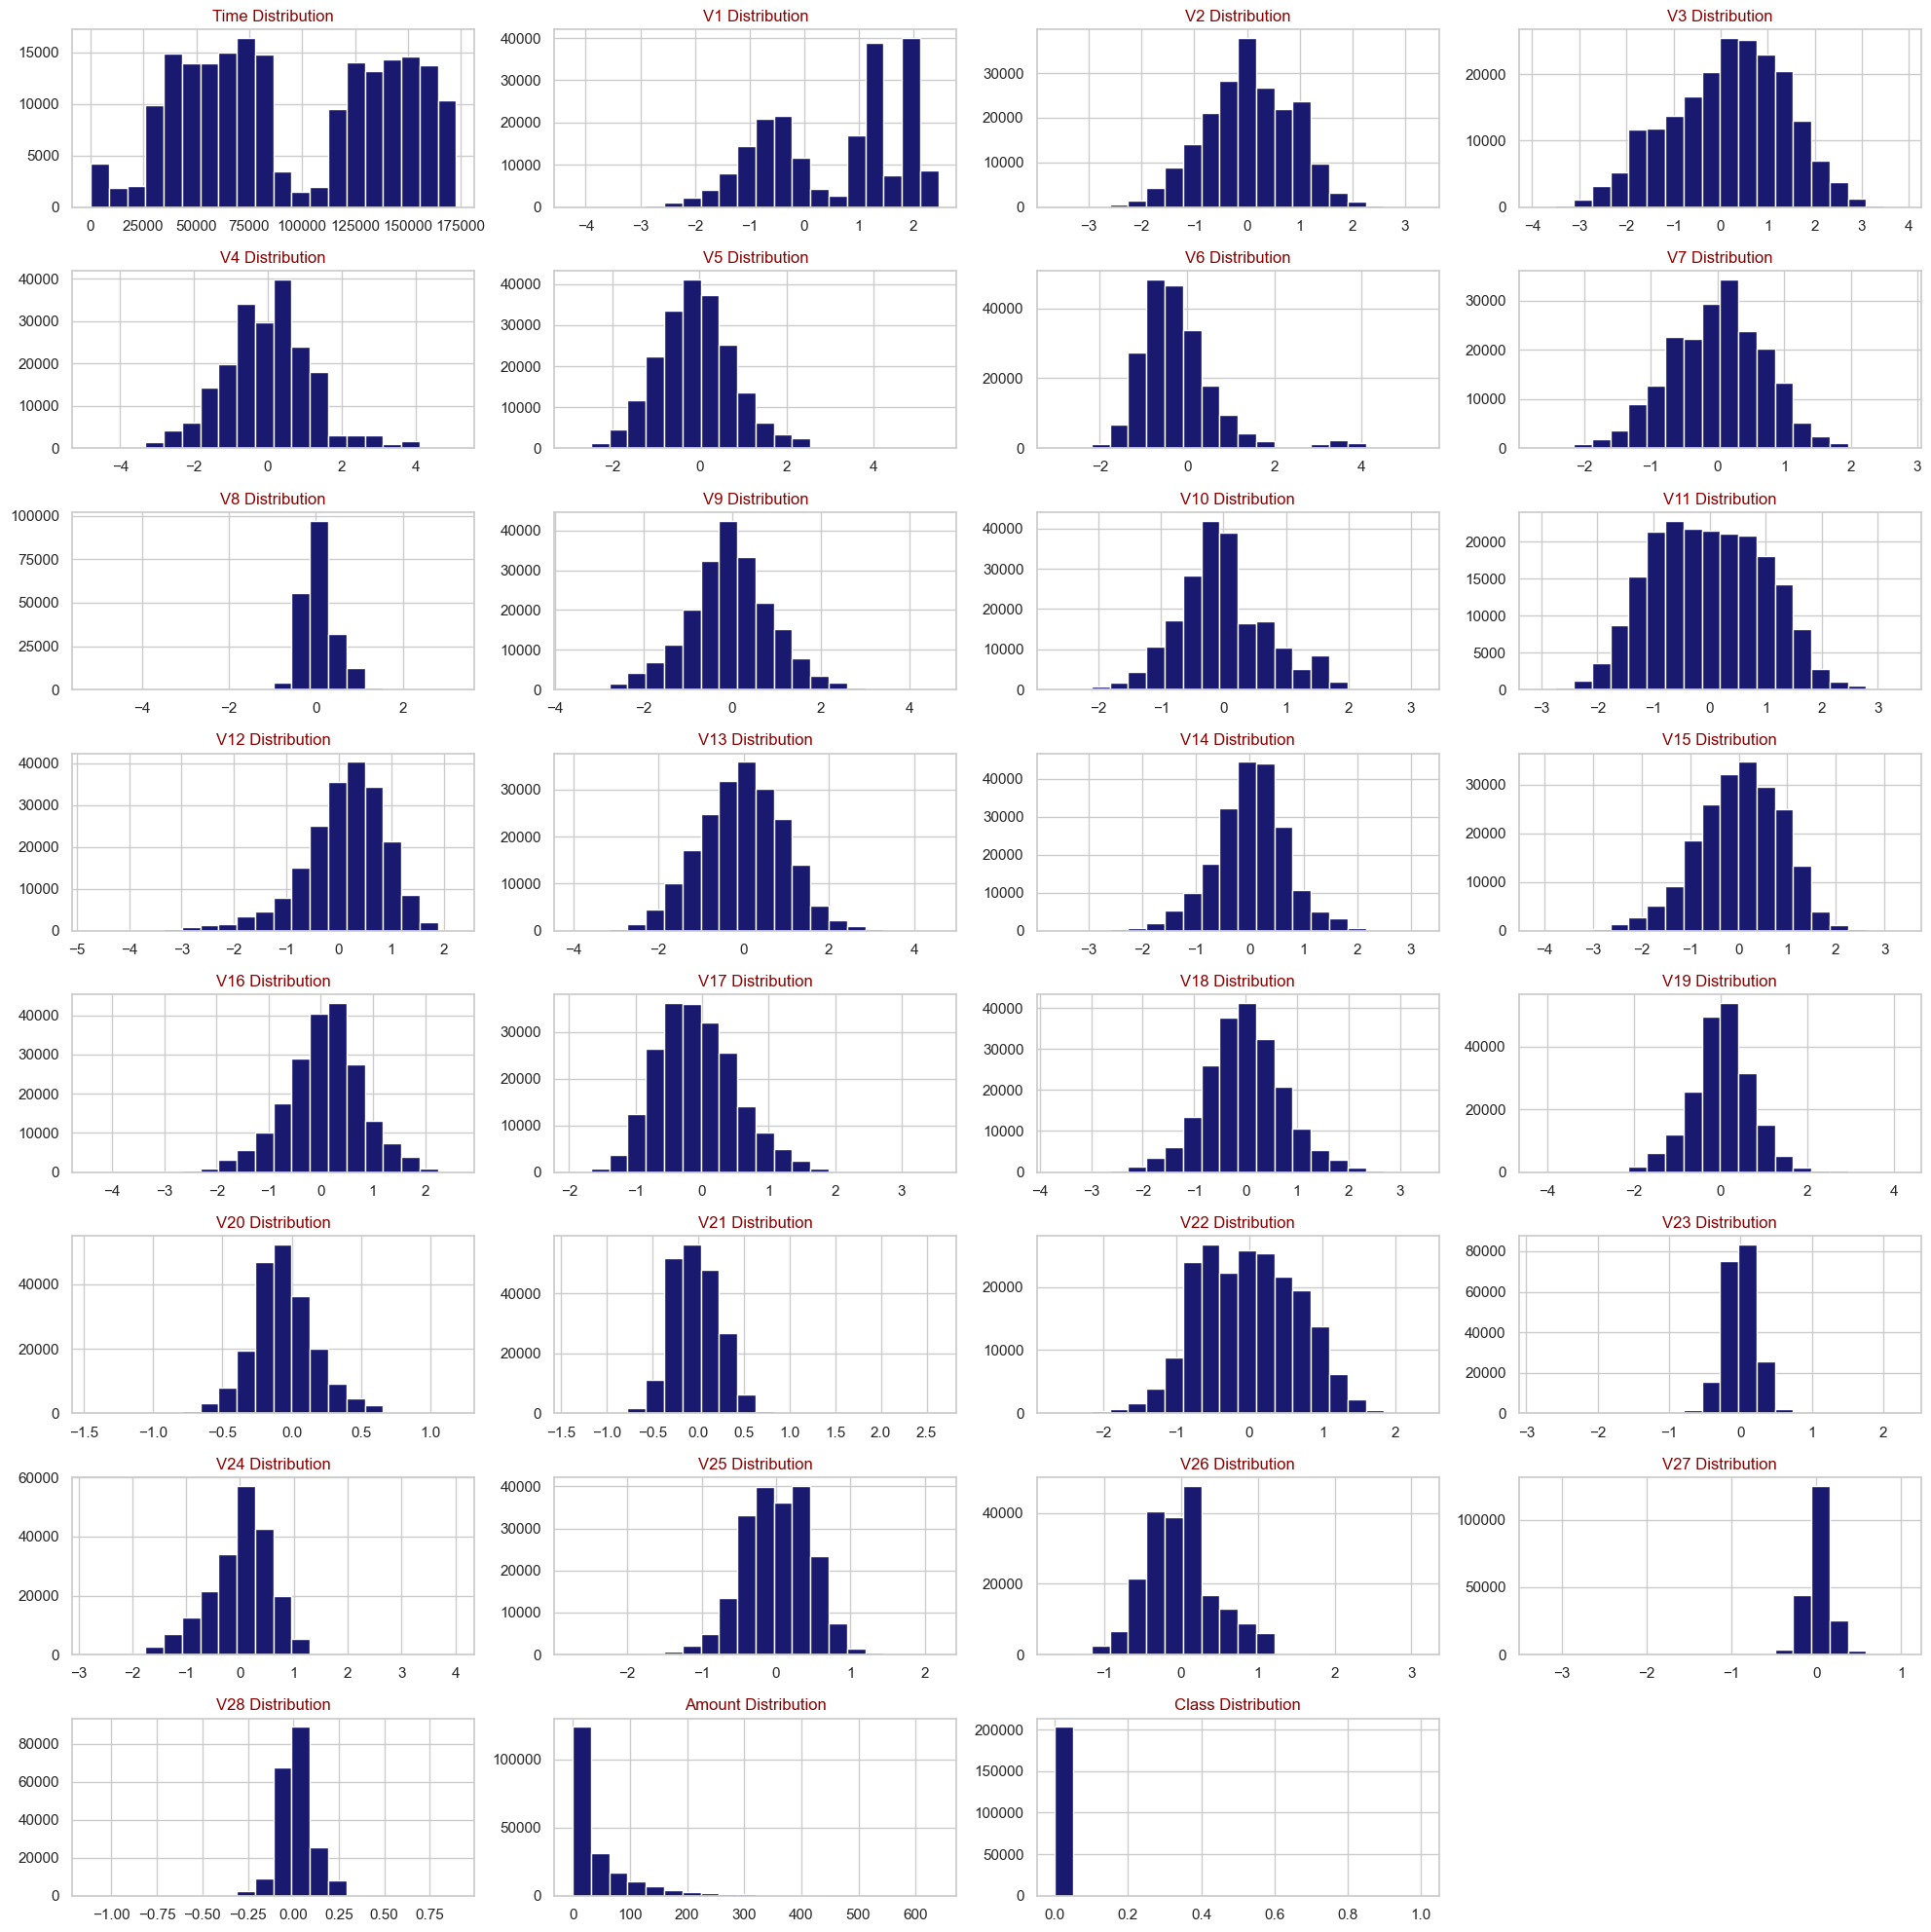

In [25]:
draw_histograms(df_out, df_out.columns,8,4)

In [26]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [27]:
df_out.Class.value_counts()

Class
0    203351
1        26
Name: count, dtype: int64

<Axes: >

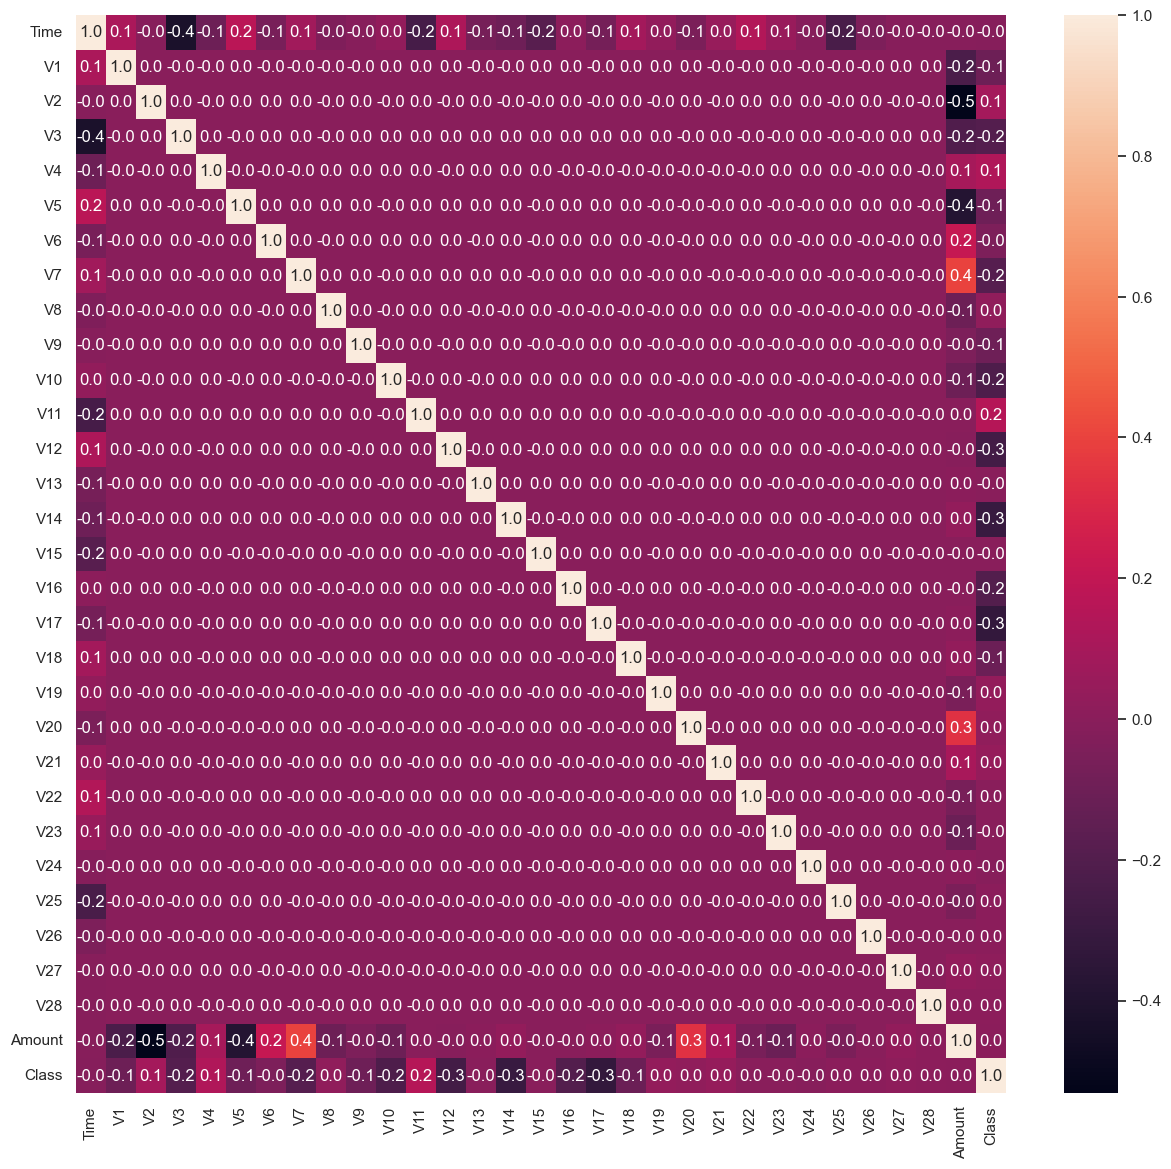

In [28]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, fmt=".1f")

---
---


## 2. Data Preprocessing

#### Train - Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Scalling

In [26]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [33]:
# !pip install deepchecks -U --quiet

In [27]:
import sys
from deepchecks.tabular.datasets.classification import lending_club

In [28]:
output_col = 'Class'
train_ds, test_ds = train_test_split(df, stratify=df [output_col], test_size=0.30,random_state=111)

train_deepcheck = Dataset(train_ds, label=output_col, cat_features=[])
test_deepcheck = Dataset(test_ds, label=output_col, cat_features=[ ])

In [29]:
from deepchecks.tabular.suites import train_test_validation

validation_suite = train_test_validation()
suite_result = validation_suite.run(train_deepcheck, test_deepcheck)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result

Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_N1QU37XQTIKW05G9ZN8G5N1V6">Train Test Validat…

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

***ii. Model Training***

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
operations = [("scaler", RobustScaler()),
              ("lr_model",LogisticRegression(max_iter = 1000))]
lr_model = Pipeline(steps=operations)

lr_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('lr_model', LogisticRegression(max_iter=1000))])

In [34]:
eval_metric(lr_model, X_train, y_train, X_test, y_test)

Test_Set
[[56851    13]
 [   34    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227419     32]
 [   142    252]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.64      0.74       394

    accuracy                           1.00    227845
   macro avg       0.94      0.82      0.87    227845
weighted avg       1.00      1.00      1.00    227845



#### LR Cross Validation

In [50]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

f1_fraud = make_scorer(f1_score, average=None, labels=[1])
precision_fraud = make_scorer(precision_score, average=None, labels=[1])
recall_fraud = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_fraud": f1_fraud,
    "precision_fraud": precision_fraud,
    "recall_fraud": recall_fraud,
}

In [41]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    lr_model,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                2.6991
score_time              0.0214
test_f1_fraud           0.7324
train_f1_fraud          0.7469
test_precision_fraud    0.8784
train_precision_fraud   0.8915
test_recall_fraud       0.6296
train_recall_fraud      0.6427
dtype: float64

***iii. Prediction and Model Evaluating  and Tuning***

In [53]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [43]:
lr=LogisticRegression(max_iter = 1000)
operations = [("logistic", lr)]

pipe_model = Pipeline(steps=operations)

param_grid = {
    "logistic__C": [0.001, 0.01],  # 100, 1000
    #"logistic__penalty": ["l1", "l2"],
    #"logistic__class_weight": ["balanced"],
    "logistic__solver": ["saga"],
    "logistic__max_iter" : [20000],
}

# Create the HalvingGridSearchCV object
halving_search = HalvingGridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_fraud)

# Fit the model to the data
halving_search.fit(X_train_scaled, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('logistic',
                                               LogisticRegression(max_iter=1000))]),
                    param_grid={'logistic__C': [0.001, 0.01],
                                'logistic__max_iter': [20000],
                                'logistic__solver': ['saga']},
                    scoring=make_scorer(recall_score, average=None, labels=[1]))

In [44]:
halving_search.best_estimator_

Pipeline(steps=[('logistic',
                 LogisticRegression(C=0.01, max_iter=20000, solver='saga'))])

In [45]:
pd.DataFrame(halving_search.cv_results_).loc[
    halving_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.5837
mean_train_score   0.5939
Name: 1, dtype: object

In [46]:
eval_metric(halving_search, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[56852    12]
 [   40    58]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.59      0.69        98

    accuracy                           1.00     56962
   macro avg       0.91      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227426     25]
 [   159    235]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.60      0.72       394

    accuracy                           1.00    227845
   macro avg       0.95      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [35]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


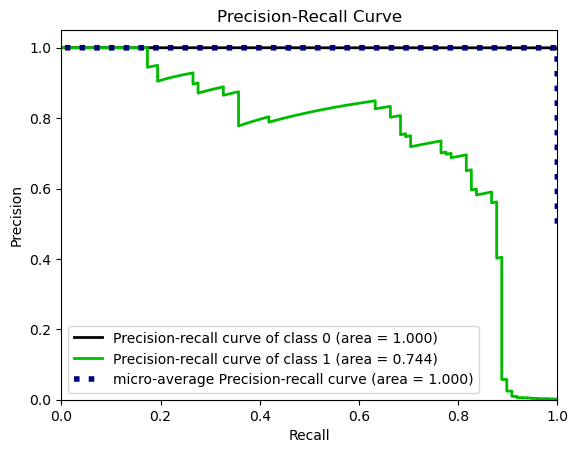

In [36]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve

y_pred_proba = lr_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [37]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_train, label=y_train)
test_ds = Dataset(X_test, label=y_test)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [38]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, lr_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 15 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_XKFH05ZSMNWK6TYB3ACU9IQO4">Model Evaluation S…

### Logistic Regression with Unbalanced Data Techniques

In [39]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

***i. Train-Test Split (Again)***

Under-sambilling and Over-sambilling the target column

In [40]:
from imblearn.under_sampling import RandomUnderSampler

# Custom undersampling
undersampler = RandomUnderSampler(sampling_strategy={0: 4000}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [41]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [42]:
print(pd.Series(y_resampled).value_counts())

Class
0    4000
1     394
Name: count, dtype: int64


In [43]:
from imblearn.over_sampling import RandomOverSampler

# Custom oversampling
oversampler = RandomOverSampler(sampling_strategy={1: 1000}, random_state=42)
X_resampled_o, y_resampled_o = oversampler.fit_resample(X_resampled, y_resampled)

In [44]:
print(pd.Series(y_resampled_o).value_counts())

Class
0    4000
1    1000
Name: count, dtype: int64


We must be sure that the ratio between the 0 and one are the same.

***ii. Model Training***

In [45]:
# operations = [("scaler", RobustScaler()),
#               ("lr_model",LogisticRegression(max_iter = 1000))]
lr_mode_UO = Pipeline(steps=operations)

lr_mode_UO.fit(X_resampled_o, y_resampled_o)

Pipeline(steps=[('scaler', RobustScaler()),
                ('lr_model', LogisticRegression(max_iter=1000))])

In [46]:
eval_metric(lr_mode_UO, X_resampled_o, y_resampled_o, X_test, y_test)

Test_Set
[[56472   392]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.89      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962


Train_Set
[[3977   23]
 [ 114  886]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4000
           1       0.97      0.89      0.93      1000

    accuracy                           0.97      5000
   macro avg       0.97      0.94      0.96      5000
weighted avg       0.97      0.97      0.97      5000



In [51]:
scores = cross_validate(
    lr_mode_UO,
    X_resampled_o,
    y_resampled_o,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                0.0539
score_time              0.0047
test_f1_fraud           0.9241
train_f1_fraud          0.9290
test_precision_fraud    0.9687
train_precision_fraud   0.9752
test_recall_fraud       0.8840
train_recall_fraud      0.8870
dtype: float64

***Prediction and Model Evaluating and Tuning***

In [54]:
X_train_scaled_resampled = scaler.fit_transform(X_resampled_o)
lr=LogisticRegression(max_iter = 1000)
operations = [("logistic", lr)]
pipe_model = Pipeline(steps=operations)

param_grid = {
    "logistic__C": [0.001, 0.01],  # 100, 1000
    #"logistic__penalty": ["l1", "l2"],
    "logistic__class_weight": [{0: 1, 1: 10}],
    "logistic__solver": ["saga"],
    "logistic__max_iter" : [20000],
}

# Create the HalvingGridSearchCV object
halving_search = HalvingGridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_fraud)

halving_search.fit( X_train_scaled_resampled, y_resampled_o)

HalvingGridSearchCV(estimator=Pipeline(steps=[('logistic',
                                               LogisticRegression(max_iter=1000))]),
                    param_grid={'logistic__C': [0.001, 0.01],
                                'logistic__class_weight': [{0: 1, 1: 10}],
                                'logistic__max_iter': [20000],
                                'logistic__solver': ['saga']},
                    scoring=make_scorer(recall_score, average=None, labels=[1]))

In [55]:
# Print the best parameters found
print("Best parameters found: ", halving_search.best_params_)

Best parameters found:  {'logistic__C': 0.01, 'logistic__class_weight': {0: 1, 1: 10}, 'logistic__max_iter': 20000, 'logistic__solver': 'saga'}


In [56]:
eval_metric(halving_search, X_train_scaled_resampled, y_resampled_o, X_test_scaled, y_test)

Test_Set
[[48246  8618]
 [    6    92]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     56864
           1       0.01      0.94      0.02        98

    accuracy                           0.85     56962
   macro avg       0.51      0.89      0.47     56962
weighted avg       1.00      0.85      0.92     56962


Train_Set
[[3801  199]
 [  54  946]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4000
           1       0.83      0.95      0.88      1000

    accuracy                           0.95      5000
   macro avg       0.91      0.95      0.92      5000
weighted avg       0.95      0.95      0.95      5000



***iv.  Plot Precision and Recall Curve***


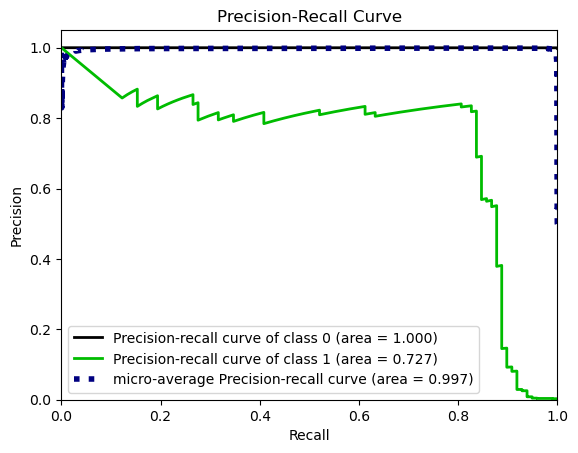

In [57]:
y_pred_proba = lr_mode_UO.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [58]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds_resamled  = Dataset(X_resampled_o, label=y_resampled_o)
test_ds_resamled = Dataset(X_test, label=y_test)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [59]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds_resamled, test_ds_resamled, lr_mode_UO)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 25 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_PTQLQD41GNJ37TUM3YXC5PL6A">Model Evaluation S…

### Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

operations = [("robust_scaler", RobustScaler()),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=7))]

RF_model = Pipeline(steps=operations)

RF_model.fit(X_train, y_train)

Pipeline(steps=[('robust_scaler', RobustScaler()),
                ('RF_model',
                 RandomForestClassifier(max_depth=7, random_state=101))])

In [61]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[56860     4]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227447      4]
 [    80    314]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.99      0.80      0.88       394

    accuracy                           1.00    227845
   macro avg       0.99      0.90      0.94    227845
weighted avg       1.00      1.00      1.00    227845



In [62]:
scores = cross_validate(
    lr_model,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                2.6189
score_time              0.0164
test_f1_fraud           0.7324
train_f1_fraud          0.7469
test_precision_fraud    0.8784
train_precision_fraud   0.8915
test_recall_fraud       0.6296
train_recall_fraud      0.6427
dtype: float64

In [63]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, RF_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 33 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_ED6K2CGEDSTH5BO5L3C22VB3V">Model Evaluation S…

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

In [64]:
operations = [("scaler", RobustScaler()),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=7))]
rf_mode_UO = Pipeline(steps=operations)

rf_mode_UO.fit(X_resampled_o, y_resampled_o)

Pipeline(steps=[('scaler', RobustScaler()),
                ('RF_model',
                 RandomForestClassifier(max_depth=7, random_state=101))])

In [65]:
eval_metric(rf_mode_UO, X_resampled_o, y_resampled_o, X_test, y_test)

Test_Set
[[56800    64]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.89      0.70        98

    accuracy                           1.00     56962
   macro avg       0.79      0.94      0.85     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[4000    0]
 [  99  901]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4000
           1       1.00      0.90      0.95      1000

    accuracy                           0.98      5000
   macro avg       0.99      0.95      0.97      5000
weighted avg       0.98      0.98      0.98      5000



In [66]:
scores = cross_validate(
    rf_mode_UO,
    X_resampled_o,
    y_resampled_o,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                0.7950
score_time              0.0064
test_f1_fraud           0.9360
train_f1_fraud          0.9473
test_precision_fraud    0.9912
train_precision_fraud   1.0000
test_recall_fraud       0.8870
train_recall_fraud      0.8999
dtype: float64

***ii. Prediction and Model Evaluating and Tuning***

In [67]:
# X_train_scaled_resampled = scaler.fit_transform(X_resampled_o)
rf=RandomForestClassifier(random_state=101)
operations = [("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

param_grid = {'RF_model__n_estimators':[50, 64],
             'RF_model__max_features':[2, 4,],
             'RF_model__max_depth':[7, 8],
             'RF_model__min_samples_split':[2, 3],
             'RF_model__min_samples_leaf': [2,3],
             'RF_model__max_samples':[0.8, 1]}

# Create the HalvingGridSearchCV object
halving_search = HalvingGridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_fraud)

halving_search.fit( X_train_scaled_resampled, y_resampled_o)

HalvingGridSearchCV(estimator=Pipeline(steps=[('RF_model',
                                               RandomForestClassifier(random_state=101))]),
                    param_grid={'RF_model__max_depth': [7, 8],
                                'RF_model__max_features': [2, 4],
                                'RF_model__max_samples': [0.8, 1],
                                'RF_model__min_samples_leaf': [2, 3],
                                'RF_model__min_samples_split': [2, 3],
                                'RF_model__n_estimators': [50, 64]},
                    scoring=make_scorer(recall_score, average=None, labels=[1]))

In [68]:
# Print the best parameters found
print("Best parameters found: ", halving_search.best_params_)

Best parameters found:  {'RF_model__max_depth': 8, 'RF_model__max_features': 4, 'RF_model__max_samples': 0.8, 'RF_model__min_samples_leaf': 2, 'RF_model__min_samples_split': 2, 'RF_model__n_estimators': 64}


In [69]:
eval_metric(halving_search, X_train_scaled_resampled, y_resampled_o, X_test_scaled, y_test)

Test_Set
[[56324   540]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.89      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962


Train_Set
[[3997    3]
 [  95  905]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4000
           1       1.00      0.91      0.95      1000

    accuracy                           0.98      5000
   macro avg       0.99      0.95      0.97      5000
weighted avg       0.98      0.98      0.98      5000



***iii. Plot Precision and Recall Curve***


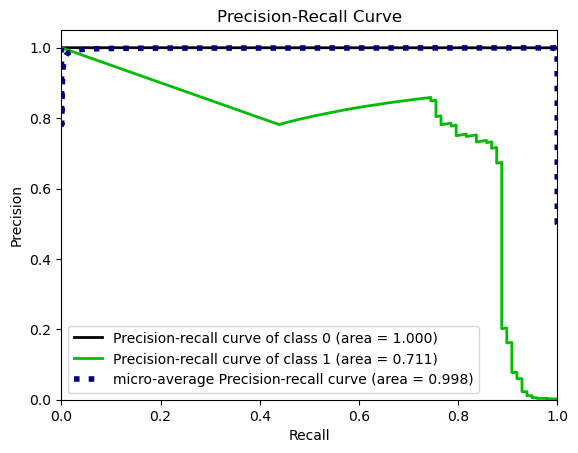

In [70]:
y_pred_proba = rf_mode_UO.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [71]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

# train_ds_resamled = Dataset(X_resampled_o, label=y_resampled_o)
# test_ds_resamled  = Dataset(X_test, label=y_test)

In [72]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds_resamled, test_ds_resamled, rf_mode_UO)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 32 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_FNYM38CQ207016JAJES0HY62K">Model Evaluation S…

### XGBoost Classifier

In [74]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/76/e8/260752c1bc8dc856b27cfefaa3fca29ba02a15f649bbf6e9c15ed54e5480/xgboost-2.0.2-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 418.6 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [75]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

xgb_model = Pipeline([("scaler", scaler), ("xgboost", xgb_classifier)])

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [76]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[56856     8]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227451      0]
 [     0    394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [77]:
scores = cross_validate(
    xgb_model,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                1.2628
score_time              0.0273
test_f1_fraud           0.8617
train_f1_fraud          1.0000
test_precision_fraud    0.9506
train_precision_fraud   1.0000
test_recall_fraud       0.7915
train_recall_fraud      1.0000
dtype: float64

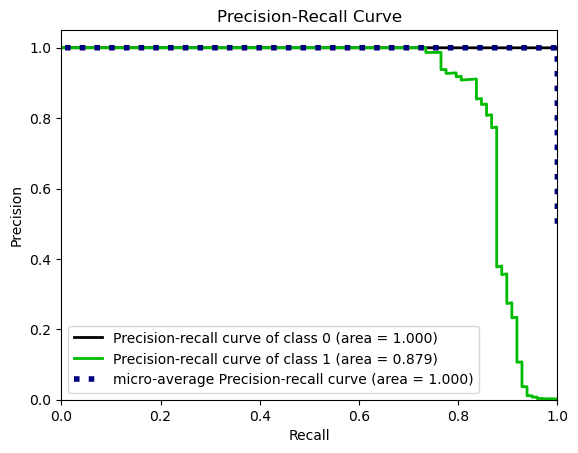

In [79]:
y_pred_proba = xgb_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [78]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, xgb_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 13 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_A4OYRY6M5K72U3CWXTS40YWU1">Model Evaluation S…

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

In [80]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()

# Create a pipeline
xgb_model_UO = Pipeline([("scaler", scaler), ("xgboost", xgb_classifier)])

xgb_model_UO.fit(X_resampled_o, y_resampled_o)

Pipeline(steps=[('scaler', RobustScaler()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [81]:
eval_metric(xgb_model_UO, X_resampled_o, y_resampled_o, X_test, y_test)

Test_Set
[[56751   113]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.89      0.58        98

    accuracy                           1.00     56962
   macro avg       0.72      0.94      0.79     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[4000    0]
 [   0 1000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [82]:
scores = cross_validate(
    xgb_model_UO,
    X_resampled_o,
    y_resampled_o,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                0.1157
score_time              0.0033
test_f1_fraud           0.9859
train_f1_fraud          1.0000
test_precision_fraud    0.9862
train_precision_fraud   1.0000
test_recall_fraud       0.9860
train_recall_fraud      1.0000
dtype: float64

***ii. Prediction and Model Evaluating and Tuning***

In [83]:
xgb=XGBClassifier()
operations = [("xgboost", xgb)]
pipe_model = Pipeline(steps=operations)

param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}

# Create the HalvingGridSearchCV object
halving_search = HalvingGridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_fraud)

halving_search.fit(X_train_scaled_resampled, y_resampled_o)

HalvingGridSearchCV(estimator=Pipeline(steps=[('xgboost',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric=None,
                                                             feature_types=None,
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constra...
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]),
                    param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                                'xgboost__learning_rate': [0.1, 0.2],
                                'xgboost__max_depth': [3, 4],
                                'xgboost__n_estimators': [50, 100],
                                'xgboost__reg_alpha': [0, 0.25, 0.5],
                                'xgboost__subsample': [0.5, 0.8, 1]},
                    scoring=make_scorer(recall_score, average=None, labels=[1]))

In [84]:
# Print the best parameters found
print("Best parameters found: ", halving_search.best_params_)

Best parameters found:  {'xgboost__colsample_bytree': 0.5, 'xgboost__learning_rate': 0.2, 'xgboost__max_depth': 3, 'xgboost__n_estimators': 100, 'xgboost__reg_alpha': 0.5, 'xgboost__subsample': 0.8}


In [85]:
eval_metric(halving_search, X_train_scaled_resampled, y_resampled_o, X_test_scaled, y_test)

Test_Set
[[55982   882]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.17        98

    accuracy                           0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962


Train_Set
[[3998    2]
 [   3  997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



***iii. Plot Precision and Recall Curve***


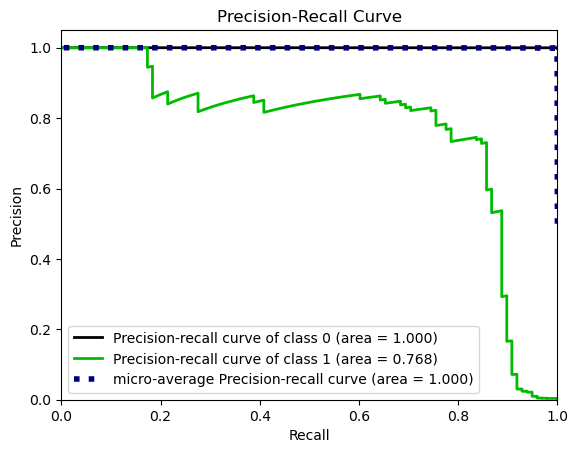

In [86]:
y_pred_proba = xgb_model_UO.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [87]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds_resamled, test_ds_resamled, xgb_model_UO)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 16 seconds


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_SVIO4LUEGME47JQN3IBM38HGT">Model Evaluation S…

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map.

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [88]:
import keras
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential

***ii. Define Model***

In [89]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(12, input_shape=(X_train_scaled.shape[1],), activation="relu"))
model.add(Dense(12, input_shape=X_train.shape[1:], activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(118, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

***iii. Compile Model***

In [90]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["Recall", "Precision"])

***iv. Fit Model***

In [91]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

Epoch 1/50


2023-12-13 14:11:55.573698: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7121/7121 [==============================] - 7s 886us/step - loss: 0.0074 - recall: 0.6218 - precision: 0.8333
Epoch 2/50
7121/7121 [==============================] - 5s 766us/step - loss: 0.0037 - recall: 0.7614 - precision: 0.8621
Epoch 3/50
7121/7121 [==============================] - 5s 739us/step - loss: 0.0034 - recall: 0.7640 - precision: 0.8674
Epoch 4/50
7121/7121 [==============================] - 5s 753us/step - loss: 0.0035 - recall: 0.7563 - precision: 0.8613
Epoch 5/50
7121/7121 [==============================] - 5s 713us/step - loss: 0.0034 - recall: 0.7411 - precision: 0.8665
Epoch 6/50
7121/7121 [==============================] - 5s 710us/step - loss: 0.0030 - recall: 0.7208 - precision: 0.8712
Epoch 7/50
7121/7121 [==============================] - 5s 732us/step - loss: 0.0034 - recall: 0.7690 - precision: 0.8584
Epoch 8/50
7121/7121 [==============================] - 5s 731us/step - loss: 0.0029 - recall: 0.7437 - precision: 0.8746
Epoch 9/50
7121/7121 [=============

***v. Prediction and Model Evaluating***

In [92]:
def evaluate_model(model, X_train, y_train, X_test, y_test, threshold=0.5, plot_confusion_matrix=True):
    # Predictions on training set
    y_train_pred_prob = model.predict(X_train)
    y_train_pred = (y_train_pred_prob > threshold).astype(int)
    
    # Predictions on test set
    y_test_pred_prob = model.predict(X_test)
    y_test_pred = (y_test_pred_prob > threshold).astype(int)
    
    # Classification reports
    train_report = classification_report(y_train, y_train_pred, target_names=['Class 0', 'Class 1'])
    test_report = classification_report(y_test, y_test_pred, target_names=['Class 0', 'Class 1'])
    
    print("Train Classification Report:\n", train_report)
    print("\nTest Classification Report:\n", test_report)
    
    # Confusion matrices
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    if plot_confusion_matrix:
        # Plot confusion matrices
        plot_confusion_matrix_heatmap(train_conf_matrix, "Train Confusion Matrix")
        plot_confusion_matrix_heatmap(test_conf_matrix, "Test Confusion Matrix")
    
    return train_report, test_report, train_conf_matrix, test_conf_matrix

def plot_confusion_matrix_heatmap(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

1781/1781 [==============================] - 1s 290us/step
Train Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    227451
     Class 1       0.92      0.81      0.87       394

    accuracy                           1.00    227845
   macro avg       0.96      0.91      0.93    227845
weighted avg       1.00      1.00      1.00    227845


Test Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56864
     Class 1       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.91      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



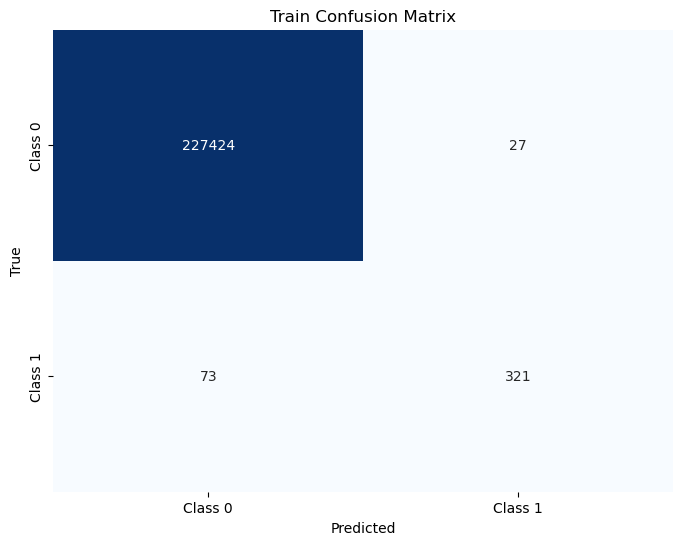

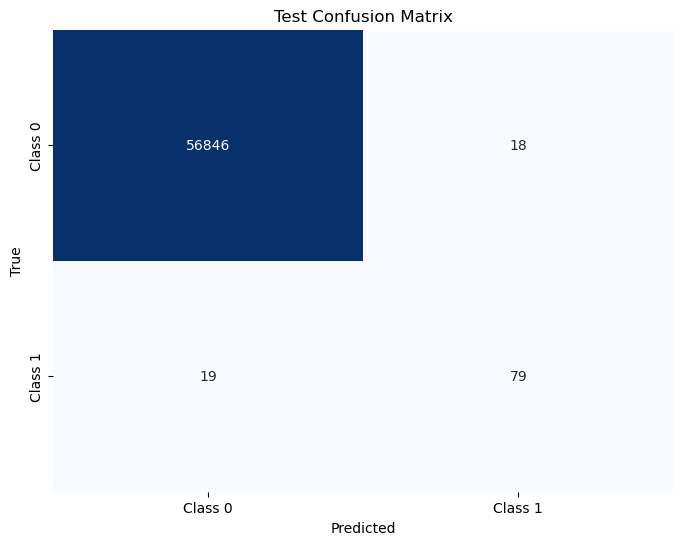

In [93]:
train_report, test_report, train_conf_matrix, test_conf_matrix = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

***vi. Plot Precision and Recall Curve***

1781/1781 [==============================] - 1s 363us/step


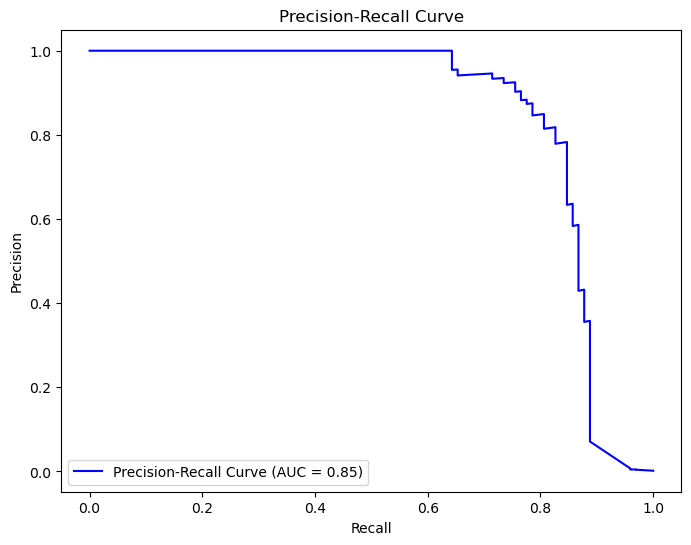

In [94]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

def plot_precision_recall(y_true, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
    area = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area:.2f})', color='b')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()

# Assuming y_test is binary (0 or 1)
y_test_binary = (y_test > 0.5).astype(int)
y_pred_prob = model.predict(X_test_scaled)

plot_precision_recall(y_test_binary, y_pred_prob)
plt.show()

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [95]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

1781/1781 [==============================] - 1s 307us/step


1/1 [==============================] - 0s 9ms/step


deepchecks - WARNING - Could not find model's classes, using the observed classes. In order to make sure the classes used by the model are inferred correctly, please use the model_classes argument


1/1 [==============================] - 0s 9ms/step


deepchecks - WARNING - Could not find built-in feature importance on the model, using permutation feature importance calculation instead


313/313 [==============================] - 0s 345us/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 166 seconds, but timeout was configured to 120 seconds


32/32 [==============================] - 0s 427us/step


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_7ZXEKH7OJ1TNKQBP3LUBMT7RY">Model Evaluation S…

## Balanced DL

In [96]:
weights_dict = {0:1,1:590}
weights_dict

{0: 1, 1: 590}

In [97]:
from tensorflow.keras.layers import Dropout

model_weighted = Sequential()
model_weighted.add(Dense(120, activation="relu", input_shape=(X_train.shape[1],)))
model_weighted.add(Dense(60, activation="relu"))
model_weighted.add(Dropout(0.3))
model_weighted.add(Dense(30, activation="relu"))
model_weighted.add(Dropout(0.3))
model_weighted.add(Dense(1, activation="sigmoid"))
model_weighted.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [98]:
operations=[("scaler", scaler),('Model',model_weighted)]
pip_model_weighted=Pipeline(steps=operations)

In [99]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=4, restore_best_weights=True
)

In [100]:
pip_model_weighted.fit(X=X_train, y=y_train, Model__validation_split=0.1, Model__batch_size=32, Model__epochs=20, Model__verbose=1,Model__class_weight=weights_dict)

Epoch 1/20
6409/6409 [==============================] - 5s 732us/step - loss: 1.2896 - recall: 0.8109 - val_loss: 0.2554 - val_recall: 0.9778
Epoch 2/20
6409/6409 [==============================] - 5s 728us/step - loss: 0.6648 - recall: 0.9140 - val_loss: 0.1294 - val_recall: 0.9778
Epoch 3/20
6409/6409 [==============================] - 5s 704us/step - loss: 0.5725 - recall: 0.8997 - val_loss: 0.0797 - val_recall: 0.9556
Epoch 4/20
6409/6409 [==============================] - 5s 743us/step - loss: 0.5861 - recall: 0.9026 - val_loss: 0.0718 - val_recall: 0.9111
Epoch 5/20
6409/6409 [==============================] - 5s 765us/step - loss: 0.9018 - recall: 0.8940 - val_loss: 0.1581 - val_recall: 0.9778
Epoch 6/20
6409/6409 [==============================] - 5s 733us/step - loss: 0.4785 - recall: 0.9312 - val_loss: 0.0543 - val_recall: 0.9556
Epoch 7/20
6409/6409 [==============================] - 4s 653us/step - loss: 0.4213 - recall: 0.9341 - val_loss: 0.0545 - val_recall: 0.9556
Epoch 

Pipeline(steps=[('scaler', RobustScaler()),
                ('Model',
                 <keras.engine.sequential.Sequential object at 0x30cecd010>)])

1781/1781 [==============================] - 1s 289us/step
Train Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99    227451
     Class 1       0.07      0.96      0.13       394

    accuracy                           0.98    227845
   macro avg       0.53      0.97      0.56    227845
weighted avg       1.00      0.98      0.99    227845


Test Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99     56864
     Class 1       0.06      0.87      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



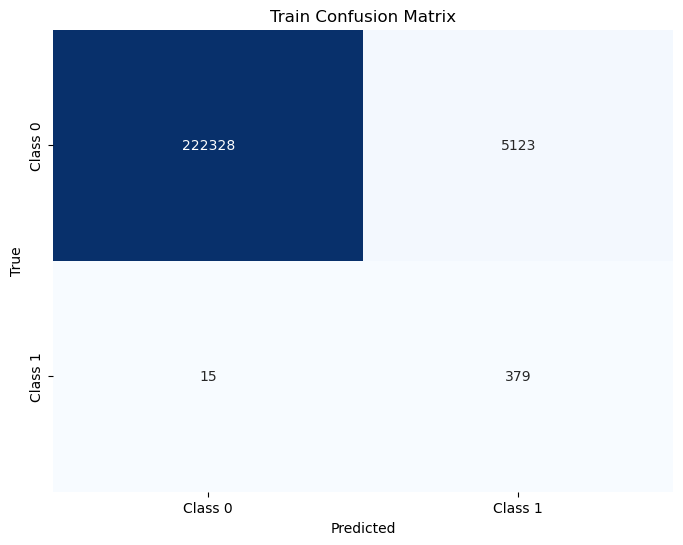

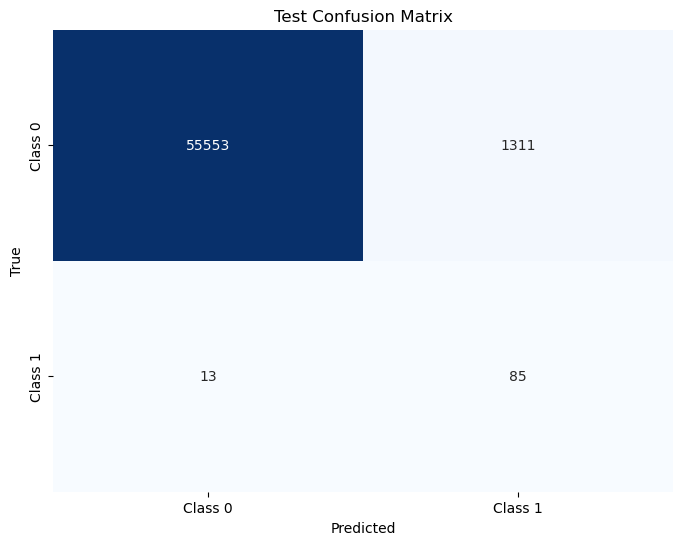

In [101]:
train_report, test_report, train_conf_matrix, test_conf_matrix = evaluate_model(pip_model_weighted, X_train, y_train, X_test, y_test)

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [103]:
evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds_resamled, test_ds_resamled, pip_model_weighted)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

1781/1781 [==============================] - 1s 290us/step


1/1 [==============================] - 0s 14ms/step


deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead


313/313 [==============================] - 0s 355us/step


deepchecks - WARNING - Features importance was not calculated:
Skipping permutation importance calculation: calculation was projected to finish in 170 seconds, but timeout was configured to 120 seconds


32/32 [==============================] - 0s 339us/step


Accordion(children=(VBox(children=(HTML(value='\n<h1 id="summary_8GVRLNWB0XJXJZ3RE8AOYLCNV">Model Evaluation S…

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


In [104]:
RF_model_2=RandomForestClassifier(random_state=101, max_depth=7)
RF_model_2.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=7, random_state=101)

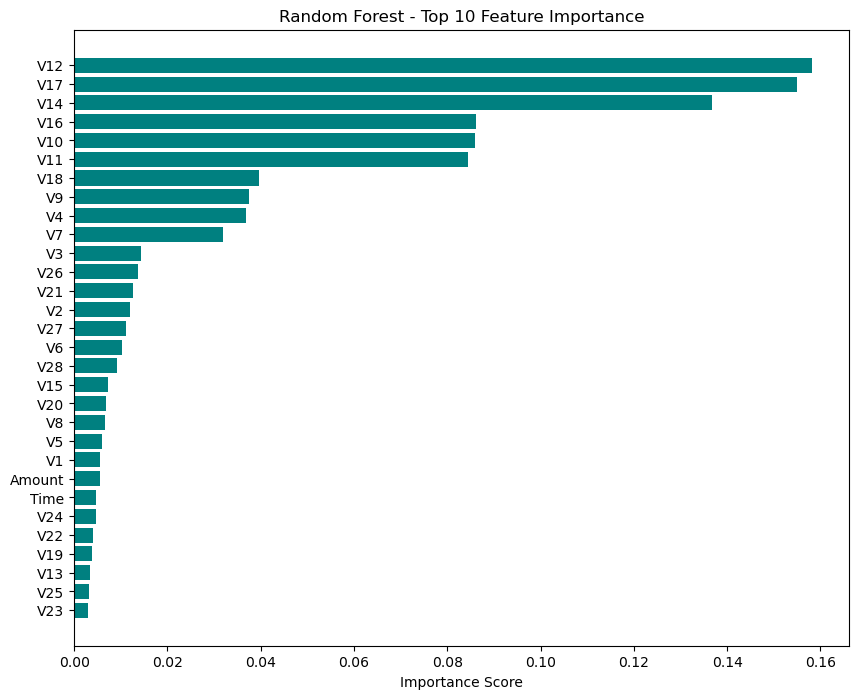

In [105]:
feature_importances = RF_model_2.feature_importances_

feature_names = X_train.columns  # Sort features based on importance

sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)
# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:30], importance[:30], color='teal')
plt.title('Random Forest - Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

In [106]:
sorted_feature_importance[:10]

[('V12', 0.15826381655004806),
 ('V17', 0.15490492128472022),
 ('V14', 0.13665484978034),
 ('V16', 0.08609586762598516),
 ('V10', 0.08597143917301384),
 ('V11', 0.08437846490227326),
 ('V18', 0.039708043734691015),
 ('V9', 0.03754362956795944),
 ('V4', 0.036826270084249726),
 ('V7', 0.03198410544753346)]

In [107]:
# print keys for feature importance
ls = []
fm = sorted_feature_importance[:10]
for i, feature_name in fm:
  ls.append(i)

In [108]:
ls

['V12', 'V17', 'V14', 'V16', 'V10', 'V11', 'V18', 'V9', 'V4', 'V7']

In [109]:
X = df[ls]
y = df['Class']

In [110]:
X

,V12,V17,V14,V16,V10,V11,V18,V9,V4,V7
0,-0.6178,0.2080,-0.3112,-0.4704,0.0908,-0.5516,0.0258,0.3638,1.3782,0.2396
1,1.0652,-0.1148,-0.1438,0.4639,-0.1670,1.6127,-0.1834,-0.2554,0.4482,-0.0788
2,0.0661,1.1100,-0.1659,-2.8901,0.2076,0.6245,-0.1214,-1.5147,0.3798,0.7915
3,0.1782,-0.6841,-0.2879,-1.0596,-0.0550,-0.2265,1.9658,-1.3870,-0.8633,0.2376
4,0.5382,-0.2370,-1.1197,-0.4514,0.7531,-0.8228,-0.0382,0.8177,0.4030,0.5929
...,...,...,...,...,...,...,...,...,...,...
284802,2.7119,1.9917,4.6269,1.1076,4.3562,-1.5931,0.5106,1.9144,-2.0667,-4.9182
284803,0.9158,-0.0257,-0.6751,-0.7118,-0.9759,-0.1502,-1.2212,0.5848,-0.7386,0.0243
284804,0.0631,0.3135,-0.5106,0.1407,-0.4848,0.4116,0.3957,0.4325,-0.5578,-0.2968
284805,-0.9629,0.5099,0.4496,-0.6086,-0.3991,-1.9338,1.1140,0.3921,0.6898,-0.6862


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

operations = [("robust_scaler", RobustScaler()),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=7))]

RF_model_f = Pipeline(steps=operations)

RF_model_f.fit(X_train, y_train)

Pipeline(steps=[('robust_scaler', RobustScaler()),
                ('RF_model',
                 RandomForestClassifier(max_depth=7, random_state=101))])

In [113]:
eval_metric(RF_model_f, X_train, y_train, X_test, y_test)

Test_Set
[[56856     8]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227439     12]
 [    70    324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.82      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845



In [114]:
operations = [("robust_scaler", RobustScaler()),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=7))]

Final_model = Pipeline(steps=operations)

Final_model.fit(X, y)

Pipeline(steps=[('robust_scaler', RobustScaler()),
                ('RF_model',
                 RandomForestClassifier(max_depth=7, random_state=101))])

### Save and Export Variables

In [115]:
import pickle
pickle.dump(Final_model, open('rf_model_f.pkl', 'wb'))
pickle.dump(Final_model, open('rf_model_f', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___